#Tabulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url, 'data.json');

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
import json

In [ ]:
with open('data.json') as f:
  data = json.load(f)
data

In [8]:
data = data['states_daily']

In [9]:
covid_data = pd.json_normalize(data)

In [10]:
covid_data.drop('dateymd', axis=1, inplace=True)

In [11]:
df = covid_data

In [12]:
df.date = pd.to_datetime(df.date)

In [13]:
df = df[df.status == 'Confirmed']

In [14]:
df.drop('status', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df.set_index('date', inplace=True)

In [ ]:
df.info()

In [17]:
df = df.apply(pd.to_numeric)

In [ ]:
df.info()

##Styling Tabulation

In [19]:
df.style

Output hidden; open in https://colab.research.google.com to view.

In [20]:
def colour_red_negative(x):
  color = 'red' if x<0 else 'white'
  return 'color:' + color

In [21]:
df.style.highlight_max(color='red')

Output hidden; open in https://colab.research.google.com to view.

In [22]:
df.style.highlight_min(color='yellow')

Output hidden; open in https://colab.research.google.com to view.

In [23]:
df.style.highlight_max(color='red').highlight_min(color='green')

Output hidden; open in https://colab.research.google.com to view.

#Stacked Bar plot(Absolute)

In [24]:
url = 'https://api.covid19india.org/states_daily.json' 
urllib.request.urlretrieve(url, 'data.json');

In [25]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [26]:
df_=df.tail(3)
df_.drop(['date','dateymd'], axis=1, inplace = True)
df_.set_index('status', inplace = True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_.head()

status,Confirmed,Recovered,Deceased
an,31,34,0
ap,5674,8014,45
ar,231,229,0
as,3571,5141,40
br,349,494,7


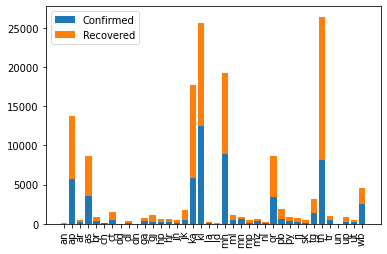

In [28]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.legend(labels=['Confirmed','Recovered']);
plt.xticks(rotation = 90);

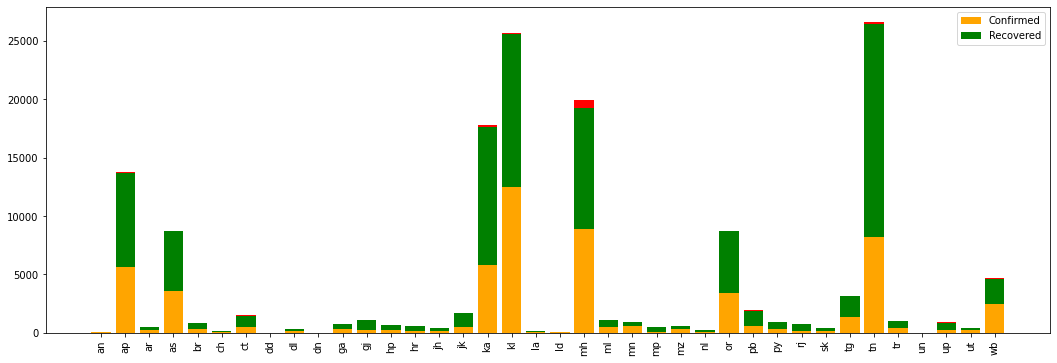

In [29]:
fig = plt.gcf();
fig.set_size_inches(18 , 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.legend(labels=['Confirmed','Recovered']);
plt.xticks(rotation = 90);

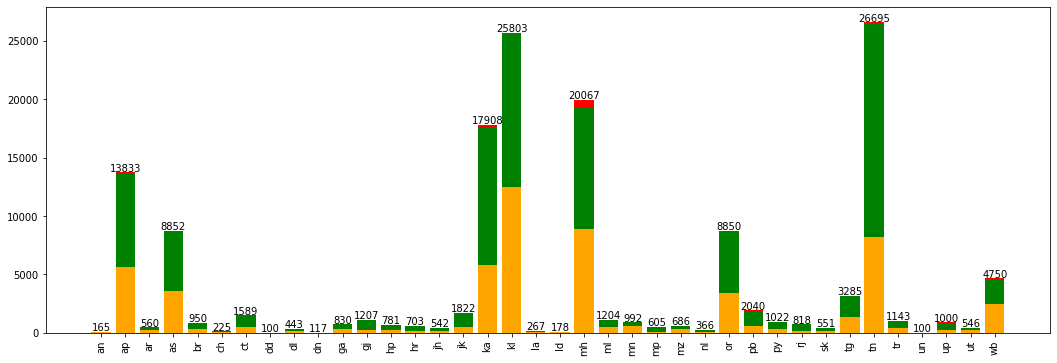

In [30]:
fig = plt.gcf();
fig.set_size_inches(18 , 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation = 90);

for i, val in enumerate(df_.index):
    y=df_.loc[val].sum() + 100
    x=i
    plt.text(x , y, str(y), ha="center");

#Relative Stacked Bar Plot

In [31]:
df_['Total']=0
df_['Total']= df_.sum(axis=1)
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,31,34,0,65
ap,5674,8014,45,13733
ar,231,229,0,460
as,3571,5141,40,8752
br,349,494,7,850


In [32]:
df_['ConfirmedFraction']=df_['Confirmed']/df_['Total']
df_['RecoveredFraction']=df_['Recovered']/df_['Total']
df_['DeceasedFraction']=df_['Deceased']/df_['Total']

In [33]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,31,34,0,65,0.476923,0.523077,0.000000
ap,5674,8014,45,13733,0.413165,0.583558,0.003277
ar,231,229,0,460,0.502174,0.497826,0.000000
as,3571,5141,40,8752,0.408021,0.587409,0.004570
br,349,494,7,850,0.410588,0.581176,0.008235


In [34]:
df_ = df_.sort_values('DeceasedFraction', ascending=False)

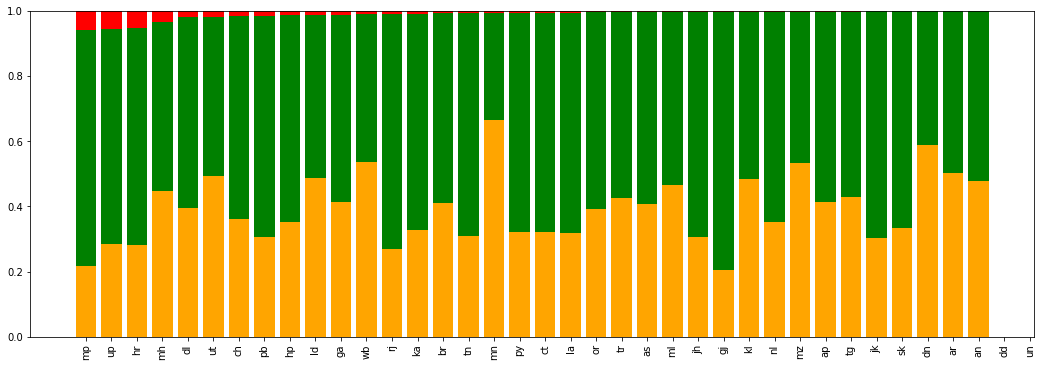

In [35]:
fig = plt.gcf();
fig.set_size_inches(18 , 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation = 90);

In [36]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

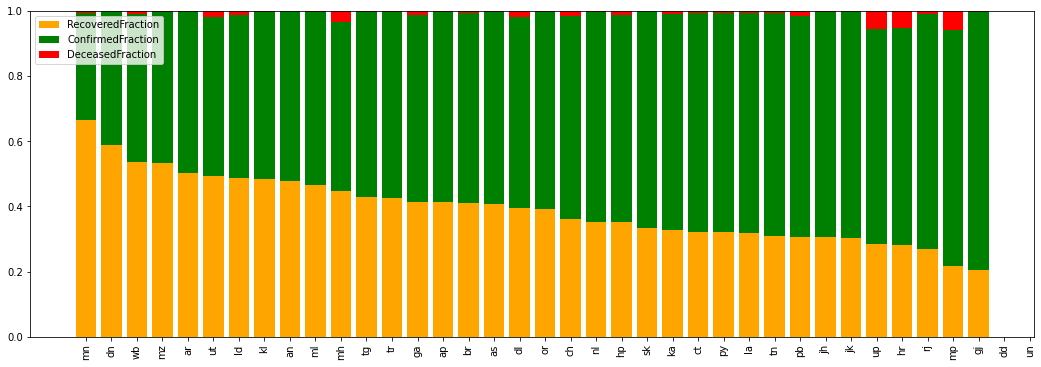

In [37]:
fig = plt.gcf();
fig.set_size_inches(18 , 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.legend(labels=['RecoveredFraction','ConfirmedFraction','DeceasedFraction']);
plt.xticks(rotation = 90);

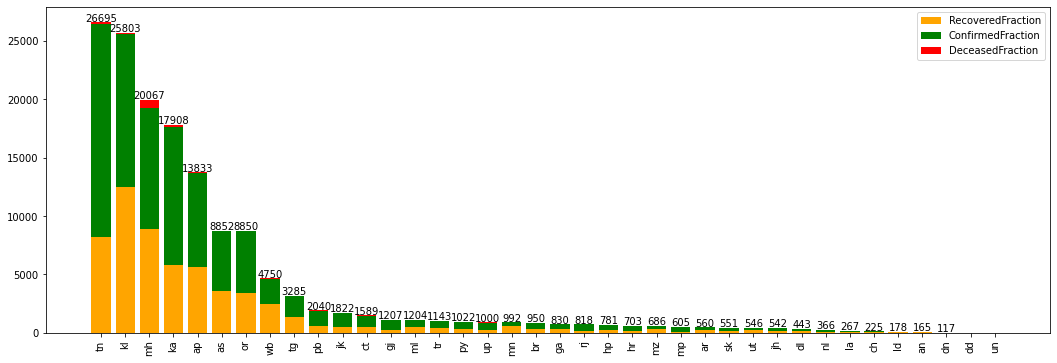

In [38]:
df_ = df_.sort_values('Total', ascending=False)
fig = plt.gcf();
fig.set_size_inches(18 , 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.legend(labels=['RecoveredFraction','ConfirmedFraction','DeceasedFraction']);
plt.xticks(rotation = 90);

for i, val in enumerate(df_.index):
    y=df_.loc[val, 'Total'] + 100
    if y>100:
      x=i
      plt.text(x , y, str(y), ha="center");

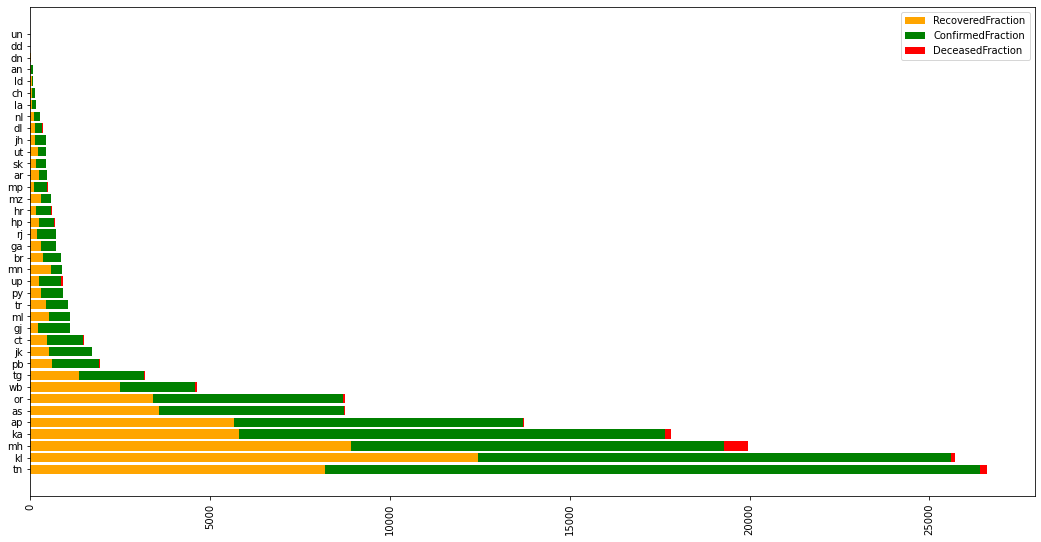

In [39]:
df_ = df_.sort_values('Total', ascending=False)
fig = plt.gcf();
fig.set_size_inches(18 , 9);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red');
plt.legend(labels=['RecoveredFraction','ConfirmedFraction','DeceasedFraction']);
plt.xticks(rotation = 90);

#Time Varying Composition Of data

##Stacked Area Plot 

In [40]:
url = 'https://api.covid19india.org/states_daily.json' 
urllib.request.urlretrieve(url, 'data.json');

In [41]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [42]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [43]:
df.drop('dateymd', axis=1, inplace=True)

In [44]:
df_=df[['mh', 'date', 'status']]
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [45]:
df_['mh']=pd.to_numeric(df_['mh']);
df_['date']=pd.to_datetime(df_['date']);
df_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


##Pivot
date | confirmed | recovered | deceased |  


1.   2020-03-14 | 14 | 0 | 0

1.   2020-03-18 | 18 | 0 | 0


   Format will look like this
   


In [46]:
df_ = df_.pivot_table(values="mh",columns="status",index="date")
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


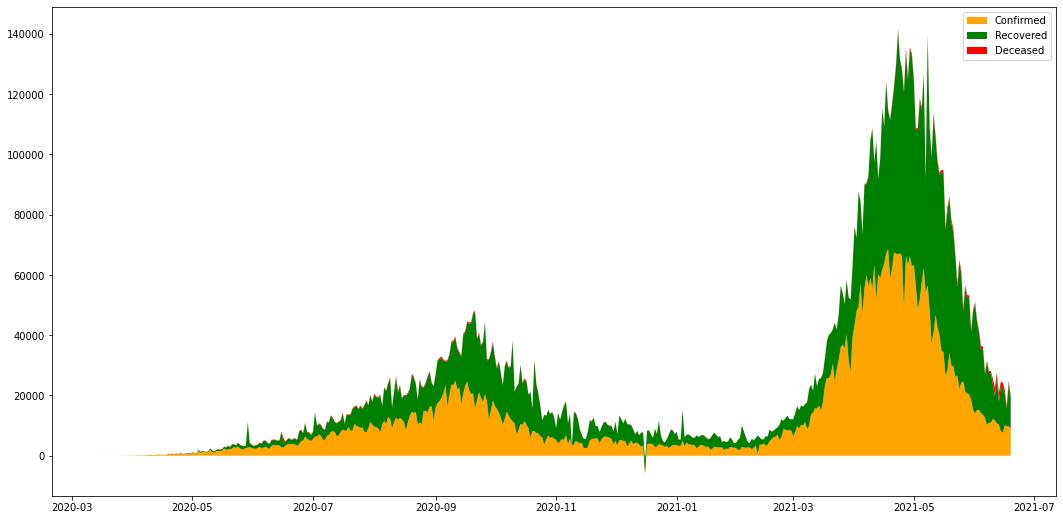

In [47]:
fig = plt.gcf();
fig.set_size_inches(18 , 9);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed','Recovered','Deceased'],
              colors=['orange','green','red']);
plt.legend();

#Scatter plot(Relationships of data)



In [48]:
df_['Total']=0
df_['Total']= df_.sum(axis=1)


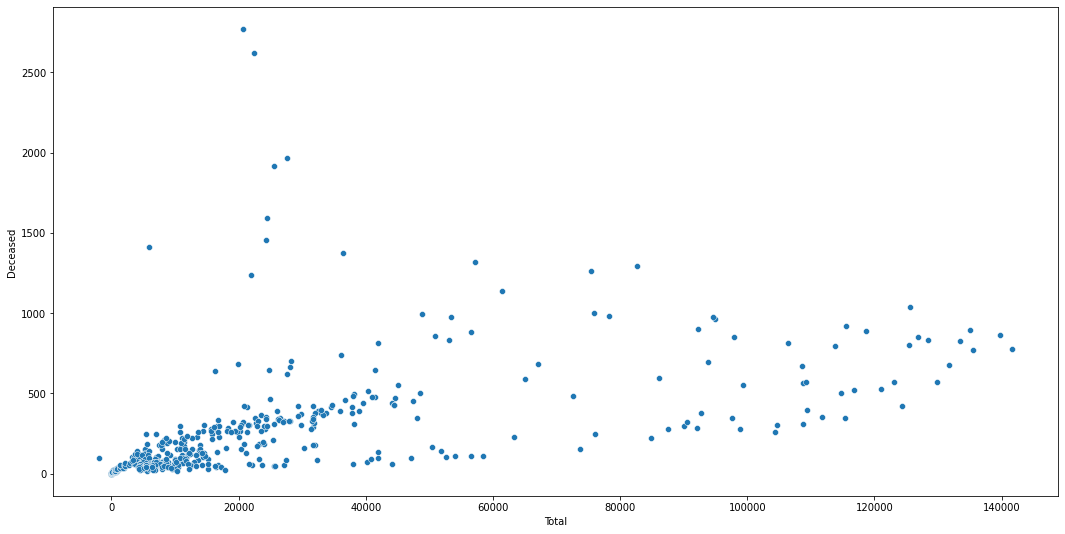

In [49]:
fig = plt.gcf();
fig.set_size_inches(18 , 9);
sns.scatterplot(x='Total',y='Deceased',data=df_);

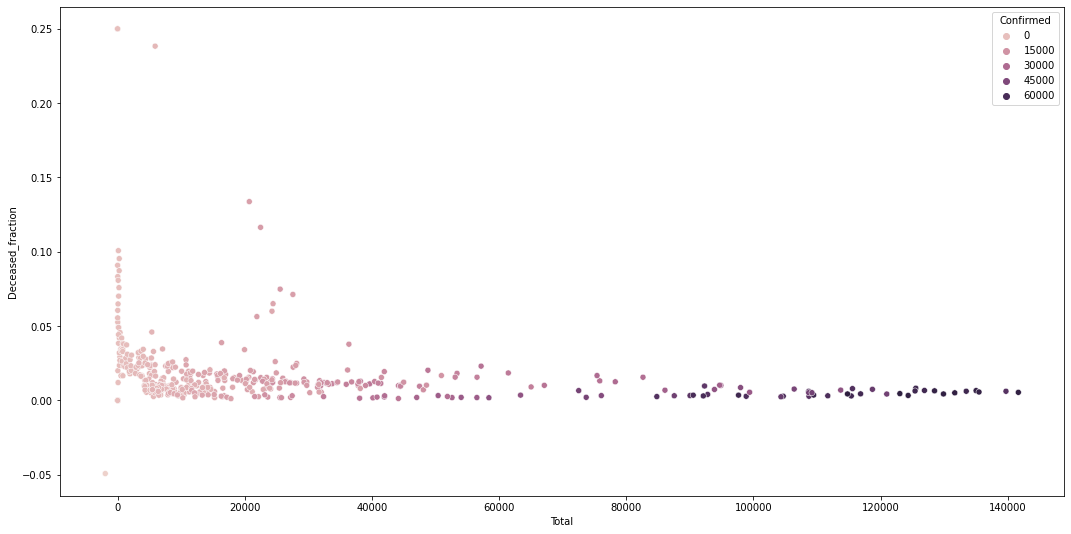

In [50]:
fig = plt.gcf();
fig.set_size_inches(18 , 9);
df_['Deceased_fraction']=df_['Deceased']/df_['Total']
sns.scatterplot(x='Total',y='Deceased_fraction',data=df_,hue='Confirmed');


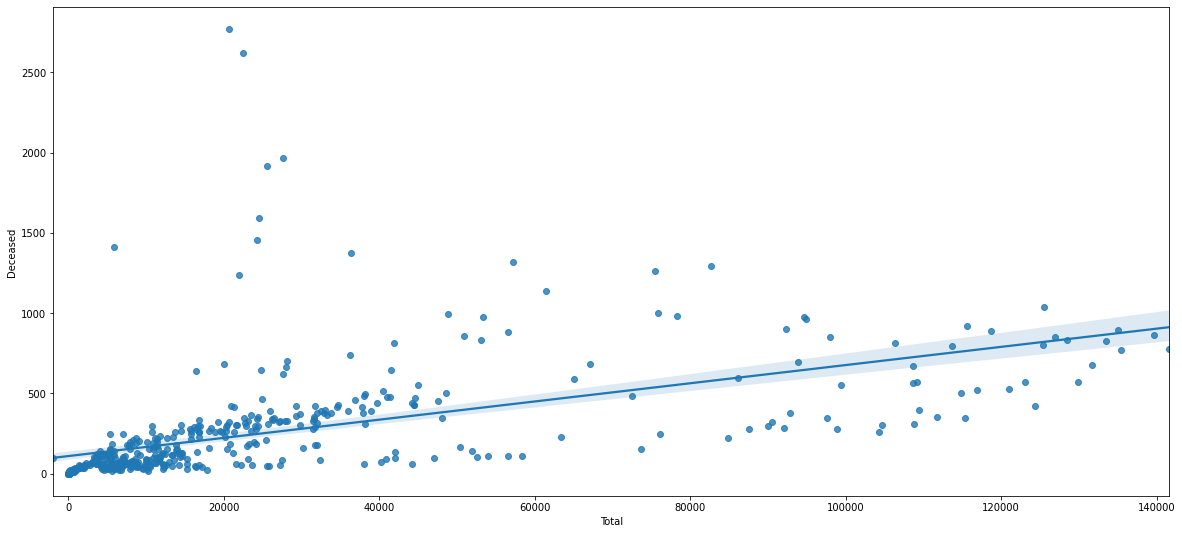

In [51]:
fig = plt.gcf();
fig.set_size_inches(20, 9);
sns.regplot(x='Total',y='Deceased',data=df_);

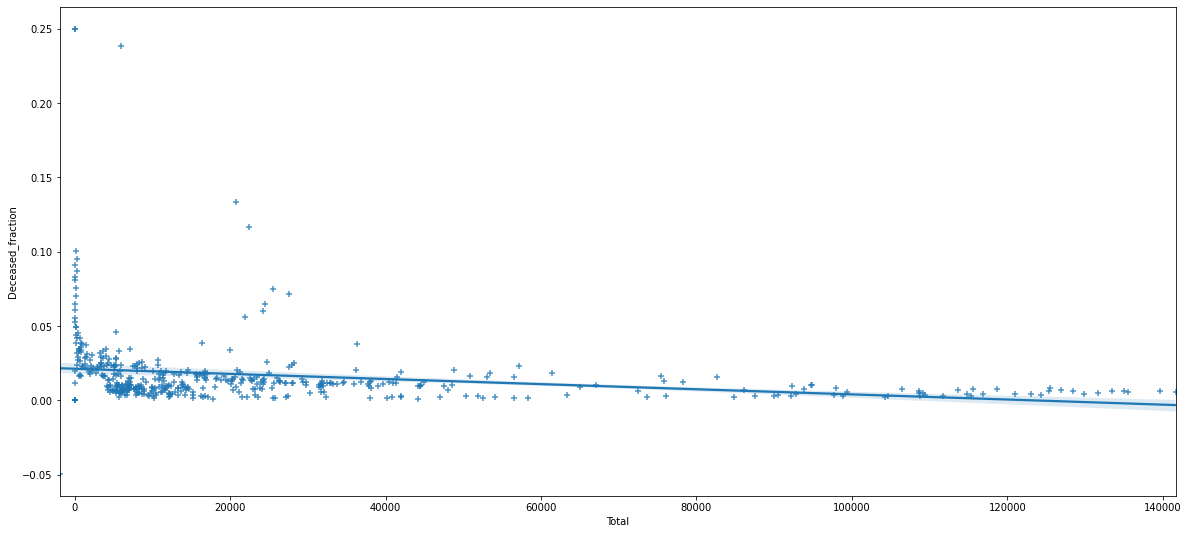

In [52]:
fig = plt.gcf();
fig.set_size_inches(20, 9);
sns.regplot(x='Total',y='Deceased_fraction',data=df_,marker="+");